In [ ]:
import pandas as pd
from scipy.stats import kstest

df = pd.read_csv('creditcard.csv')

# Split data into fraudulent (1) and non-fraudulent (0) transactions
fraudulent = df[df['Class'] == 1]
non_fraudulent = df[df['Class'] == 0]

# Select the 'Amount' feature for comparison
fraudulent_amount = fraudulent['Amount']
non_fraudulent_amount = non_fraudulent['Amount']

# Perform the Kolmogorov-Smirnov Test
ks_stat, p_value = kstest(fraudulent_amount, non_fraudulent_amount)

# Print the KS statistic and p-value
print(f"KS Statistic: {ks_stat}")
print(f"P-value: {p_value}")

# Interpretation:
if p_value < 0.05:
    print("Accept H0: No significant difference, suggesting the data follows the same pattern.")
else:
    print("Reject H0: The distributions are significantly different, suggesting a possible fraud pattern.")


KS Statistic: 0.27119151307757383
P-value: 2.1703053464297685e-32
Accept H0: No significant difference, suggesting the data follows the same pattern.


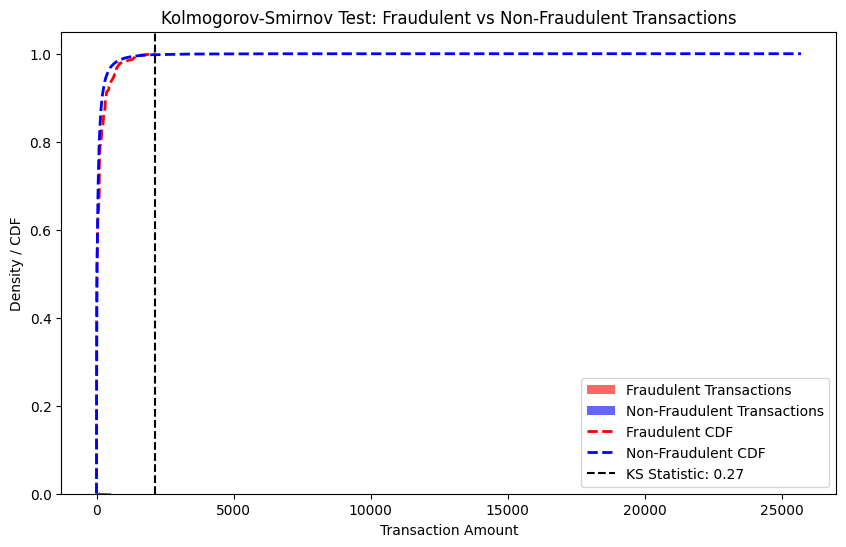

In [ ]:
# Plotting the distributions and KS Test results
plt.figure(figsize=(10, 6))

# Plot histograms for fraudulent and non-fraudulent amounts
plt.hist(fraudulent_amount, bins=50, alpha=0.6, color='red', label='Fraudulent Transactions', density=True)
plt.hist(non_fraudulent_amount, bins=50, alpha=0.6, color='blue', label='Non-Fraudulent Transactions', density=True)

# Add CDF plot for both fraudulent and non-fraudulent
# Sort the values for plotting CDF
fraudulent_sorted = sorted(fraudulent_amount)
non_fraudulent_sorted = sorted(non_fraudulent_amount)

# CDF Calculation
fraudulent_cdf = [i/len(fraudulent_sorted) for i in range(1, len(fraudulent_sorted) + 1)]
non_fraudulent_cdf = [i/len(non_fraudulent_sorted) for i in range(1, len(non_fraudulent_sorted) + 1)]

# Plot the CDFs
plt.plot(fraudulent_sorted, fraudulent_cdf, color='red', label='Fraudulent CDF', linestyle='dashed', linewidth=2)
plt.plot(non_fraudulent_sorted, non_fraudulent_cdf, color='blue', label='Non-Fraudulent CDF', linestyle='dashed', linewidth=2)

# Find the maximum difference (KS Statistic) between the two CDFs
ks_differences = [abs(f - nf) for f, nf in zip(fraudulent_cdf, non_fraudulent_cdf)]
max_diff_index = ks_differences.index(max(ks_differences))  # Get the index of the max difference

# Highlight the KS Statistic point on the plot
plt.axvline(x=fraudulent_sorted[max_diff_index], color='black', linestyle='--', label=f"KS Statistic: {ks_stat:.2f}")

# Labeling the plot
plt.title('Kolmogorov-Smirnov Test: Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Density / CDF')
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import kstest
import matplotlib.pyplot as plt


data = pd.read_csv('/content/creditcard.csv')



column_data = data['Amount']

data.head()
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


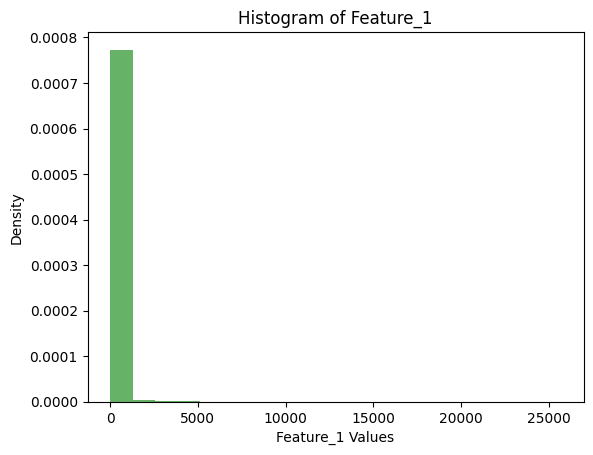

(0.3619582369741558,
 0.0,
 0.002548376424950108,
 'Reject H0: The data does not follow a normal distribution.')

In [ ]:
# Step 1: Compute the mean and standard deviation of the column data (for normal distribution comparison)
mean, std = np.mean(column_data), np.std(column_data)

# Step 2: Perform Kolmogorov-Smirnov Test
ks_stat, p_value = kstest(column_data, 'norm', args=(mean, std))

# Step 3: Compute Critical Value for KS test at α = 0.05
n = len(column_data)
ks_critical_value = 1.36 / np.sqrt(n)  # Critical value for α = 0.05 (one-sided)

# Step 4: Compare KS Statistic with Critical Value and Print Results
result = (
    "Accept H0: The data follows a normal distribution."
    if ks_stat < ks_critical_value
    else "Reject H0: The data does not follow a normal distribution."
)

# Plot histogram for visual inspection
plt.hist(column_data, bins=20, density=True, alpha=0.6, color='g')
plt.title("Histogram of Feature_1")
plt.xlabel("Feature_1 Values")
plt.ylabel("Density")
plt.show()

# Output the results
ks_stat, p_value, ks_critical_value, result

In [ ]:
import numpy as np

def kolmogorov_smirnov_test(observed, expected, ks_critical_value, test_scores):
    # Step 1: Calculate total observed frequency
    N = sum(observed)

    # Step 2: Calculate cumulative and relative cumulative frequencies
    cum_observed = np.cumsum(observed)
    cum_expected = np.cumsum(expected)
    relative_observed = cum_observed / N
    relative_expected = cum_expected / N

    # Step 3: Compute the absolute differences
    differences = np.abs(relative_observed - relative_expected)

    # Step 4: Calculate the Kolmogorov-Smirnov Statistic (Dn)
    Dn = np.max(differences)

    # Step 5: Compare Dn with the critical value and make a decision
    if Dn < ks_critical_value:
        result = "Accept the null hypothesis (H0): The distribution follows the normal distribution."
    else:
        result = "Reject the null hypothesis (H0): The distribution does not follow the normal distribution."

    # Print results
    print("\nTest Scores:", test_scores)
    print("Observed Frequencies:", observed)
    print("Expected Frequencies:", expected)
    print("Cumulative Observed Frequencies:", cum_observed)
    print("Cumulative Expected Frequencies:", cum_expected)
    print("Relative Cumulative Observed:", relative_observed)
    print("Relative Cumulative Expected:", relative_expected)
    print("Differences (|Fo/N - Fe/N|):", differences)
    print("Kolmogorov-Smirnov Statistic (Dn):", Dn)
    print("Conclusion:", result)

# Predefined Test Score Ranges
test_scores = ['51-60', '61-70', '71-80', '81-90', '91-100']

# Input Observed and Expected Frequencies
observed = np.array([30, 100, 440, 500, 130])   # Observed Frequencies
expected = np.array([40, 170, 500, 390, 100])   # Expected Frequencies
ks_critical_value = 0.510                       # Critical value for α = 0.01

# Run the Kolmogorov-Smirnov Test
kolmogorov_smirnov_test(observed, expected, ks_critical_value, test_scores)


Test Scores: ['51-60', '61-70', '71-80', '81-90', '91-100']
Observed Frequencies: [ 30 100 440 500 130]
Expected Frequencies: [ 40 170 500 390 100]
Cumulative Observed Frequencies: [  30  130  570 1070 1200]
Cumulative Expected Frequencies: [  40  210  710 1100 1200]
Relative Cumulative Observed: [0.025      0.10833333 0.475      0.89166667 1.        ]
Relative Cumulative Expected: [0.03333333 0.175      0.59166667 0.91666667 1.        ]
Differences (|Fo/N - Fe/N|): [0.00833333 0.06666667 0.11666667 0.025      0.        ]
Kolmogorov-Smirnov Statistic (Dn): 0.1166666666666667
Conclusion: Accept the null hypothesis (H0): The distribution follows the normal distribution.


In [ ]:
# Load a sample dataset and perform the Kolmogorov-Smirnov (KS) test
import numpy as np
import pandas as pd
from scipy.stats import kstest
from sklearn.datasets import load_iris

# Step 1: Load the Iris dataset and convert it to a DataFrame
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Step 2: Select a Numeric Column (we'll use "sepal length (cm)" as an example)
data = df['sepal length (cm)']

# Step 3: Compute Theoretical Distribution Parameters (mean and std of the selected column)
mean, std = np.mean(data), np.std(data)

# Step 4: Perform Kolmogorov-Smirnov Test to compare with a normal distribution
ks_stat, p_value = kstest(data, 'norm', args=(mean, std))

# Step 5: Compute Critical Value for KS test at α=0.05
n = len(data)
ks_critical_value = 1.36 / np.sqrt(n)  # Critical value for α=0.05 (one-sided)

# Step 6: Compare KS Statistic with Critical Value and Print Results
result = (
    "Accept H0: The distribution follows the normal distribution."
    if ks_stat < ks_critical_value
    else "Reject H0: The distribution does not follow the normal distribution."
)

# Output Results
print(f"KS Statistic (Dn): {ks_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"KS Critical Value: {ks_critical_value:.4f}")
print(f"Conclusion: {result}")

KS Statistic (Dn): 0.0895
P-Value: 0.1706
KS Critical Value: 0.1110
Conclusion: Accept H0: The distribution follows the normal distribution.


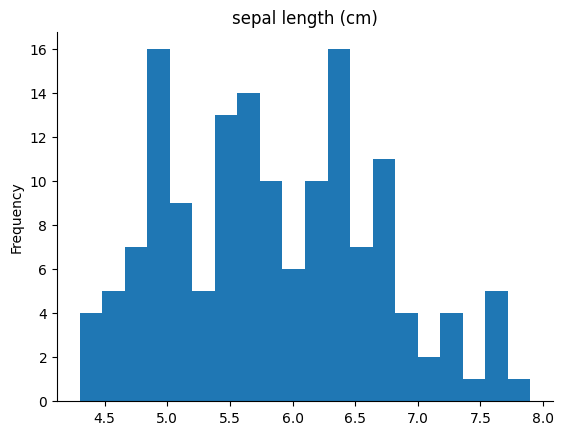

In [ ]:

from matplotlib import pyplot as plt
df['sepal length (cm)'].plot(kind='hist', bins=20, title='sepal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)